In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Creating a new dataframe
#My model will use the independent variables sex, age, sibsp and parch to predict the dependent variable  survived.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['survived'] = df['Survived']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [5]:
#Assigning survived to y and removing it from x
y = X['survived']
X = X.drop(['survived'], axis=1)

In [6]:
X

,sex,age,sibsp,parch
0,male,22.0,1,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0
5,male,NaN,0,0
6,male,54.0,0,0
7,male,2.0,3,1
8,female,27.0,0,2
9,female,14.0,1,0


In [7]:
#As Sex is a categorical variable, we need to implement one hot encoding using get_dummies
pd.get_dummies(X.sex)
#So we get two new columns female and male

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [8]:
#get_dummies returns an indicator variable for each category.
#So now Sex becomes female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

In [9]:
X

,sex,age,sibsp,parch
0,0.0,22.0,1,0
1,1.0,38.0,1,0
2,1.0,26.0,0,0
3,1.0,35.0,1,0
4,0.0,35.0,0,0
5,0.0,NaN,0,0
6,0.0,54.0,0,0
7,0.0,2.0,3,1
8,1.0,27.0,0,2
9,1.0,14.0,1,0


In [10]:
#Now you can see that there are some missing values in age variable, so we need to fill out the missing values with their mean age
mean_age=X['age'].mean()
X['age']=X['age'].fillna(mean_age)


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [12]:
#Splitting data into training set and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.78


In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [17]:
print ("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, model.predict(X_test) ))



---Logistic Model---
Logistic AUC = 0.77
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       105
          1       0.75      0.70      0.73        74

avg / total       0.78      0.78      0.78       179



In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

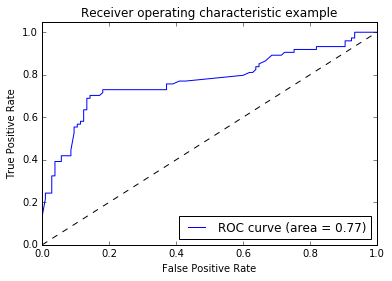

In [19]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()